In [1]:
import numpy as np
import pandas as pd
import knn_classification
import knn_regression
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Disclaimer
### This is an example notebook in order to show the implemented knn algorithm with a classification and regession task. The shown values are not the best possible values, they are just examples! 

## Topics:

<li><a href="#KNN-Classification-One-Variable">KNN Classification One Variable</a></li>
<li><a href="#KNN-Classification-Multiple-Variables">KNN Classification Multiple Variable</a></li>
<li><a href="#KNN-Regression">KNN Regression</a></li>

# KNN Classification One Variable <a class="anchor" id="KNN-Classification-One-Variable"></a>

In [2]:
#read in the data using pandas
df = pd.read_csv('../datasets/diabetes.csv')
df = df.reindex(np.random.permutation(df.index)).reset_index(drop = True)
display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,150,76,0,0,21.0,0.207,37,0
1,3,122,78,0,0,23.0,0.254,40,0
2,0,125,68,0,0,24.7,0.206,21,0
3,1,111,86,19,0,30.1,0.143,23,0
4,4,96,56,17,49,20.8,0.340,26,0
...,...,...,...,...,...,...,...,...,...
763,1,117,60,23,106,33.8,0.466,27,0
764,1,95,82,25,180,35.0,0.233,43,1
765,3,141,0,0,0,30.0,0.761,27,1
766,5,166,76,0,0,45.7,0.340,27,1


In [3]:
X = df[df.columns[1:3]]
y = df[df.columns[-1]]

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

display(X_train.head())
display(y_train.to_frame().head())

,Glucose,BloodPressure
553,152,88
742,140,85
487,121,66
51,154,78
449,109,75


,Outcome
553,1
742,0
487,1
51,0
449,0


## Not normalized

In [4]:
knn_testing = knn_classification.KNN_self(n_neighbors = 3, distance_metric="euclidean", weighting=False)

knn_testing.fit(X_train, y_train)

In [5]:
predictions = knn_testing.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [6]:
acc = knn_testing.accuracy(predictions, y_test)
print(f"Accuracy: {round(acc * 100, 2)}%")

Accuracy: 56.49%


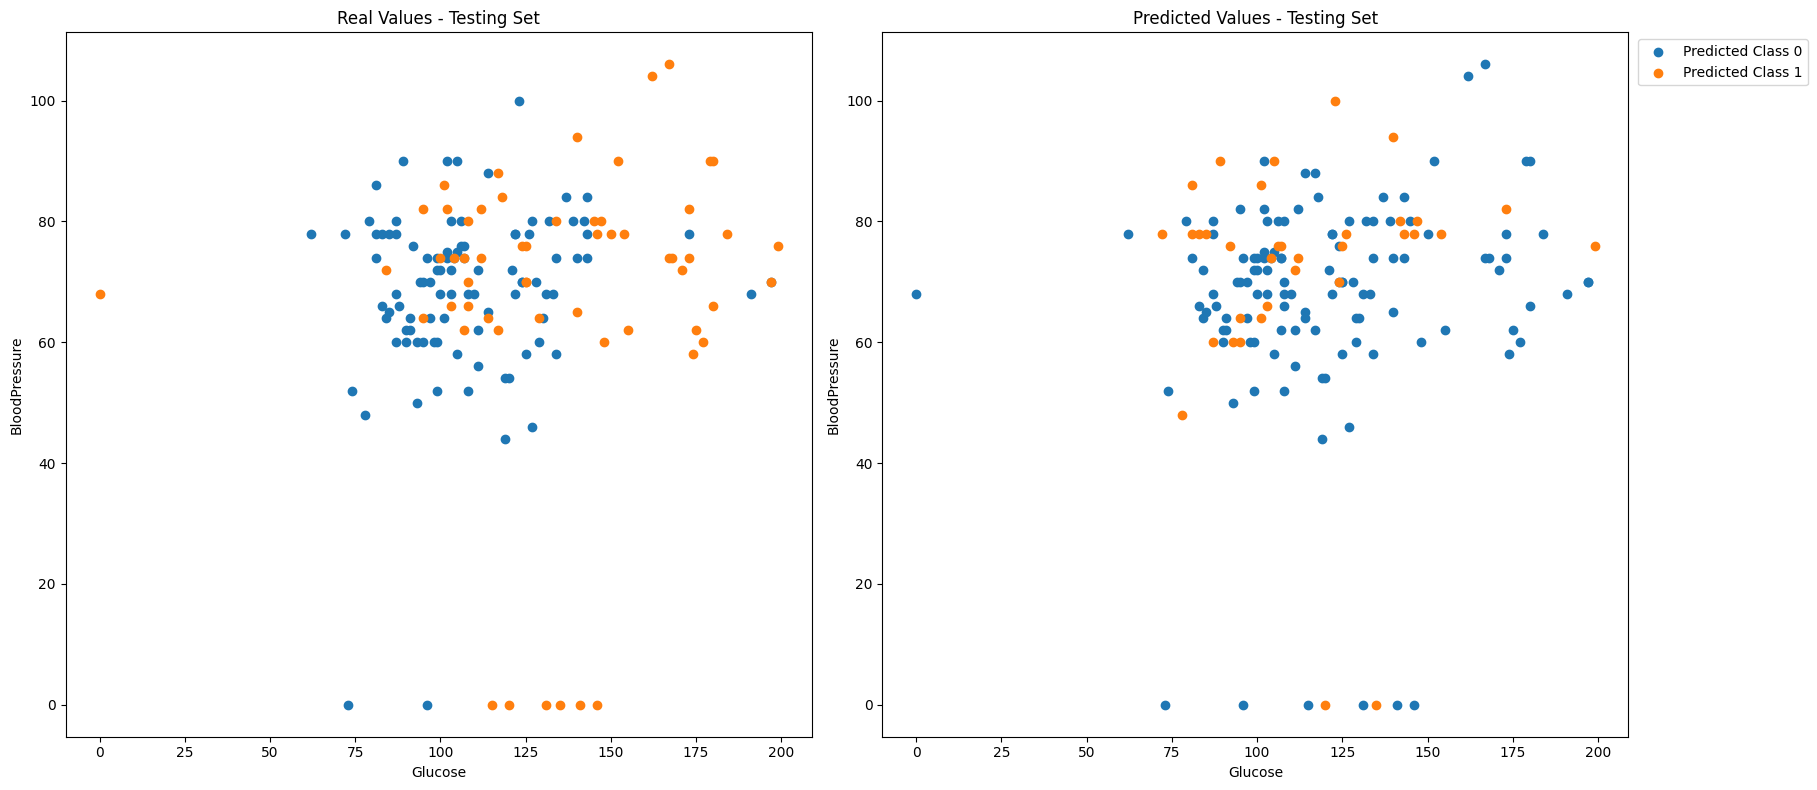

In [7]:
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

# Plot the real values for testing set
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
for class_label in np.unique(y_test_np):
    class_indices = y_test_np == class_label
    plt.scatter(X_test_np[class_indices, 0], X_test_np[class_indices, 1], label=f'Real Class {class_label}')

plt.title('Real Values - Testing Set')
plt.xlabel(X_test.columns[0])
plt.ylabel(X_test.columns[1])

# Plot the predicted values for testing set
plt.subplot(1, 2, 2)
for class_label in np.unique(predictions):
    class_indices = predictions == class_label
    plt.scatter(X_test_np[class_indices, 0], X_test_np[class_indices, 1], label=f'Predicted Class {class_label}')

plt.title('Predicted Values - Testing Set')
plt.xlabel(X_test.columns[0])
plt.ylabel(X_test.columns[1])
plt.legend(loc = 'upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()

## Normalized

In [8]:
knn_testing_scal = knn_classification.KNN_self(n_neighbors = 3, distance_metric="euclidean", weighting=True)

knn_testing_scal.fit(X_train, y_train, scaling_method="standardization")

In [9]:
predictions_scal = knn_testing_scal.predict(X_test)
predictions_scal

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [10]:
acc = knn_testing_scal.accuracy(predictions_scal, y_test)
print(f"Accuracy: {round(acc * 100, 2)}%")

Accuracy: 60.39%


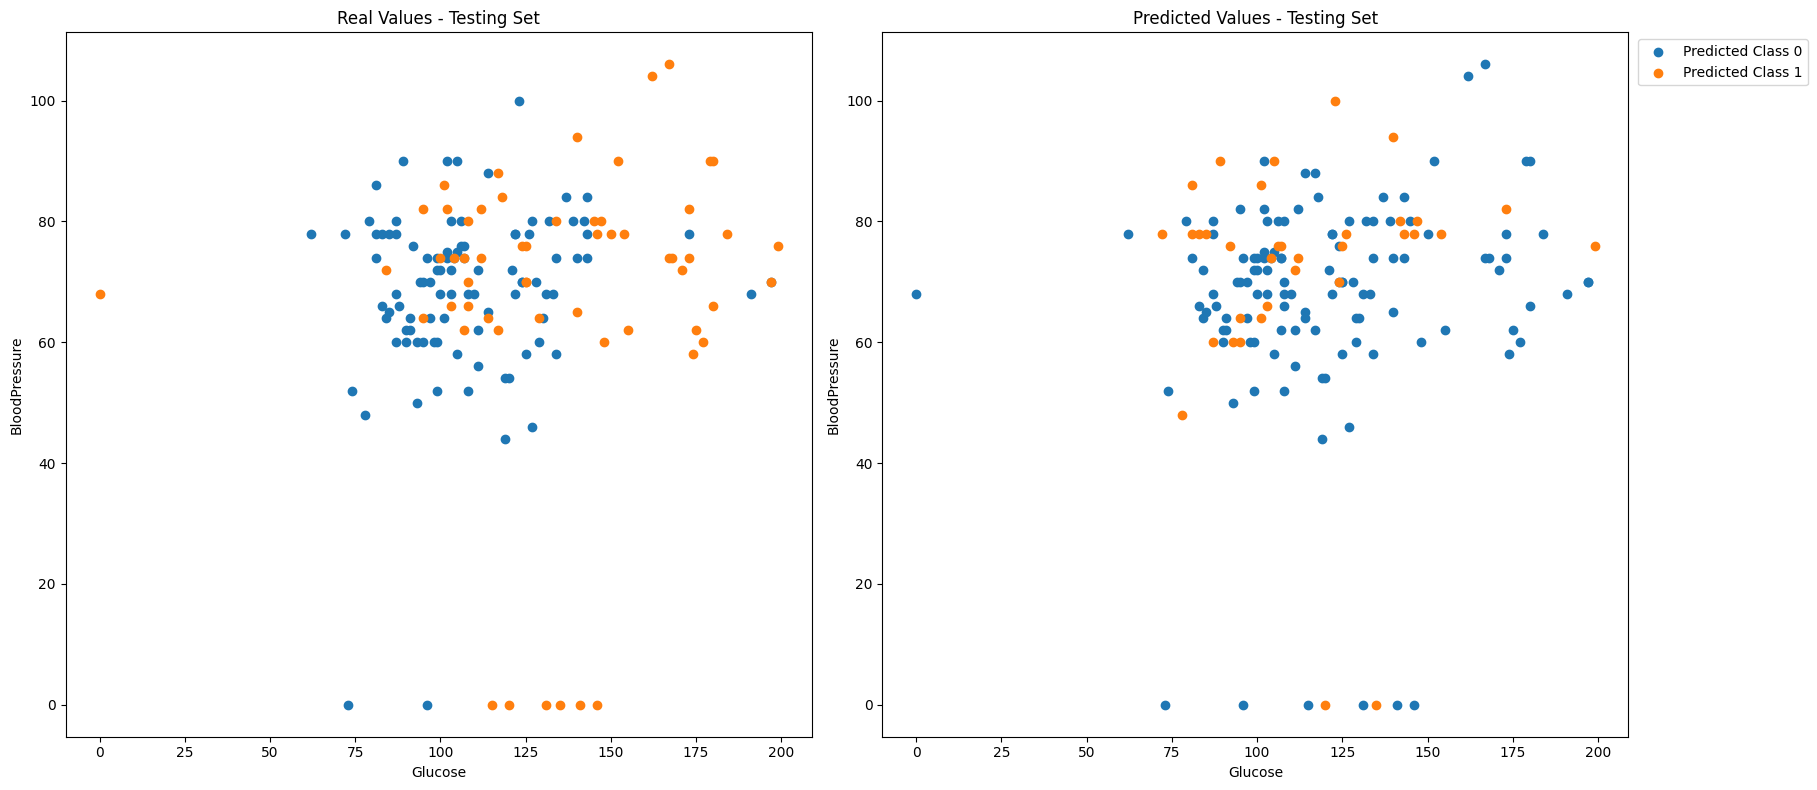

In [11]:
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

# Plot the real values for testing set
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
for class_label in np.unique(y_test_np):
    class_indices = y_test_np == class_label
    plt.scatter(X_test_np[class_indices, 0], X_test_np[class_indices, 1], label=f'Real Class {class_label}')

plt.title('Real Values - Testing Set')
plt.xlabel(X_test.columns[0])
plt.ylabel(X_test.columns[1])

# Plot the predicted values for testing set
plt.subplot(1, 2, 2)
for class_label in np.unique(predictions):
    class_indices = predictions == class_label
    plt.scatter(X_test_np[class_indices, 0], X_test_np[class_indices, 1], label=f'Predicted Class {class_label}')

plt.title('Predicted Values - Testing Set')
plt.xlabel(X_test.columns[0])
plt.ylabel(X_test.columns[1])
plt.legend(loc = 'upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()

# KNN Classification Multiple Variables <a class="anchor" id="KNN-Classification-Multiple-Variables"></a> 

In [12]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

display(X_train.head())
display(y_train.to_frame().head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
105,1,135,54,0,0,26.7,0.687,62
524,5,139,64,35,140,28.6,0.411,26
547,8,143,66,0,0,34.9,0.129,41
540,6,154,78,41,140,46.1,0.571,27
368,1,80,74,11,60,30.0,0.527,22


,Outcome
105,0
524,0
547,1
540,0
368,0


## Not normalized

In [13]:
knn_testing = knn_classification.KNN_self(n_neighbors = 3, distance_metric="euclidean", weighting=False)

knn_testing.fit(X_train, y_train)

In [14]:
predictions = knn_testing.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [15]:
acc = knn_testing.accuracy(predictions, y_test)
print(f"Accuracy: {round(acc * 100, 2)}%")

Accuracy: 51.95%


## Normalized

In [16]:
knn_testing_scal = knn_classification.KNN_self(n_neighbors = 3, distance_metric="euclidean", weighting=True)

knn_testing_scal.fit(X_train, y_train, scaling_method="standardization")

In [17]:
predictions_scal = knn_testing_scal.predict(X_test)
predictions_scal

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [18]:
acc = knn_testing_scal.accuracy(predictions_scal, y_test)
print(f"Accuracy: {round(acc * 100, 2)}%")

Accuracy: 33.77%


# KNN Regression <a class="anchor" id="KNN-Regression"></a> 

In [19]:
#read in the data using pandas
df = pd.read_csv('../datasets/advertising.csv')
display(df)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [20]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

display(X_train.head())
display(y_train.to_frame().head())

,TV,Radio,Newspaper
169,284.3,10.6,6.4
177,170.2,7.8,35.2
196,94.2,4.9,8.1
10,66.1,5.8,24.2
3,151.5,41.3,58.5


,Sales
169,20.0
177,16.7
196,14.0
10,12.6
3,16.5


## Not normalized

In [21]:
knn_testing_reg = knn_regression.KNN_self(n_neighbors = 3, distance_metric="euclidean", weighting=False)

knn_testing_reg.fit(X_train, y_train)

In [22]:
predictions_reg = knn_testing_reg.predict(X_test)
predictions_reg

array([17.2       , 17.2       , 17.2       , 17.16666667, 17.16666667,
       17.16666667, 17.16666667, 19.06666667, 18.43333333, 17.56666667,
       17.76666667, 17.76666667, 17.76666667, 17.76666667, 16.33333333,
       16.33333333, 12.66666667, 11.36666667, 14.2       , 12.66666667,
       14.46666667, 18.3       , 16.7       , 17.86666667, 17.86666667,
       17.1       , 14.63333333, 14.63333333, 18.76666667, 18.76666667,
       16.8       , 16.86666667, 16.86666667, 17.43333333, 17.43333333,
       17.43333333, 16.5       , 16.5       , 15.3       , 15.23333333])

In [23]:
loss = knn_testing_reg.error(predictions_reg, y_test, error_type="MSE")
print(f"MSE Loss: {round(loss, 2)}")

MSE Loss: 41.1


## Normalized

In [24]:
knn_testing_reg_scale = knn_regression.KNN_self(n_neighbors = 3, distance_metric="euclidean", weighting=False)

knn_testing_reg_scale.fit(X_train, y_train, scaling_method="standardization")

In [25]:
predictions_reg_scale = knn_testing_reg_scale.predict(X_test)
predictions_reg_scale

array([16.53333333, 13.33333333, 14.4       , 17.5       , 16.63333333,
       18.36666667, 19.5       , 19.36666667, 21.8       , 19.36666667,
       19.83333333, 19.66666667, 20.8       , 22.23333333, 22.23333333,
       22.93333333, 22.93333333, 22.        , 22.        , 22.        ,
       22.        , 22.        , 22.        , 22.        , 22.        ,
       22.        , 22.26666667, 22.26666667, 22.26666667, 22.26666667,
       22.26666667, 22.26666667, 22.26666667, 22.26666667, 22.26666667,
       22.26666667, 22.26666667, 22.26666667, 22.26666667, 22.26666667])

In [26]:
loss = knn_testing_reg_scale.error(predictions_reg_scale, y_test, error_type="MSE")
print(f"MSE Loss: {round(loss, 2)}")

MSE Loss: 76.17
